In [2]:
import matplotlib.pyplot as plt
import numpy as np

from datetime import timedelta


In [3]:
def time_to_seconds(time_str):
    # Split the time string into hours, minutes, and seconds
    parts = time_str.split(':')
    
    # If the time format is h:mm:ss
    if len(parts) == 3:
        hours, minutes, seconds = map(float, parts)
        total_seconds = hours * 3600 + minutes * 60 + seconds
    # If the time format is m:ss
    elif len(parts) == 2:
        minutes, seconds = map(float, parts)
        total_seconds = minutes * 60 + seconds
    else:
        print(parts)
        raise ValueError("Invalid time format")
    
    return total_seconds

def compute_avg_time(sizes, times, lines, idx):
    #first line is subset size
    size = lines[idx]
    time = 0
    
    # lines[1:3] are warm-up runs
    for j in range(3,8):
        time_str = lines[idx+j].strip().split("Elapsed (wall clock) time (h:mm:ss or m:ss): ",1)[-1]
        time = time + time_to_seconds(time_str)
    avg_time = time / 5
    sizes.append(size)
    times.append(avg_time)

In [4]:
# Open the files for reading
with open('/cluster/work/grlab/projects/metagenome/data/BIGSI/subsets/sshash/bench/brwt/res_pure_superkmers/all_times.txt', 'r') as file:
    brwt_lines = file.readlines()
with open('/cluster/work/grlab/projects/metagenome/data/BIGSI/subsets/sshash/bench/flat/res_pure_superkmers/all_times.txt', 'r') as file:
    flat_lines = file.readlines()
with open('/cluster/work/grlab/projects/metagenome/data/BIGSI/subsets/sshash/bench/res_pure_superkmers/all_times.txt', 'r') as file:
    column_lines = file.readlines()

# Stop if there are not 7*N measurements
if len(brwt_lines) % 8 != 0:
    print("Number of lines (in sshash file) is not multiple of 8! Stopping")
if len(flat_lines) % 8 != 0:
    print("Number of lines (in sshash file) is not multiple of 8! Stopping")
if len(column_lines) % 8 != 0:
    print("Number of lines (in sshash file) is not multiple of 8! Stopping")

In [5]:
# Initialize lists to store times for each series
brwt_times = []
brwt_sizes = []
flat_times = []
flat_sizes = []

col_times = []
col_sizes = []

for i in range(0,len(brwt_lines),8):
    compute_avg_time(brwt_sizes,brwt_times,brwt_lines,i)
for i in range(0,len(flat_lines),8):
    compute_avg_time(flat_sizes,flat_times,flat_lines,i)
for i in range(0,len(column_lines),8):
    compute_avg_time(col_sizes,col_times,column_lines,i)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


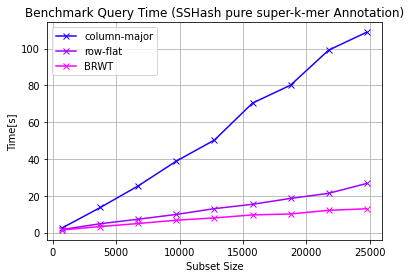

In [40]:
# Plot the two series
plt.plot(np.asarray(col_sizes,dtype=np.int32), np.asarray(col_times), label='column-major', marker='x', color='#1F00FF')
plt.plot(np.asarray(flat_sizes,dtype=np.int32), np.asarray(flat_times), label='row-flat', marker='x', color='#9F00FF')
plt.plot(np.asarray(brwt_sizes,dtype=np.int32), np.asarray(brwt_times), label='BRWT', marker='x', color='#FF00FF')
plt.xlabel('Subset Size')
plt.ylabel('Time[s]')
plt.grid()
plt.title('Benchmark Query Time (SSHash pure super-k-mer Annotation)')
plt.legend()
plt.savefig("plot_query_bench_anno_versions_pure_superkmer.eps",format='eps')
plt.show()


<Figure size 432x288 with 0 Axes>